In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path ke file csv dimasukkan ke variabel
data_path = os.path.join(os.getcwd(), 'preprocessed_data_all.csv')

# masukkan dataset ke dalam variabel df
df = pd.read_csv(data_path)

In [15]:
# mendefinisi kolom yang memprediksi (xcol) dan diprediksi (ycol) 
# pokoknya yang di hashtagin itu gaperlu, karena yang ada malah nurunin si MAE nya
ycol = 'booking_earned'  
xcol = ['stay_duration_in_days', 
        'booking_window', 
        #'lat', 
        #'lng', 
        'distance_to_coastline',
        #'breakfast', 
        #'wifi',
        #'workspace', 
        #'hot_water',
        #'parking',
        #'pool',
        #'gym',
        #'beachfront',
        'lat',
        'lng',
        'avg_daily_rate_by_property_name']

# xcol = df.drop(columns=['booking_earned', 'property_name', 'room_id'])
# ycol = df['booking_earned']

In [16]:
# bagi data jadi set training dan testing
x_train, x_test, y_train, y_test = train_test_split(df[xcol], df[ycol], test_size=0.1, random_state=42)

In [17]:
# inisialisasi RandomForestRegressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=30, n_jobs=-1, bootstrap=False)
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=4,
    bootstrap=False,
    n_jobs=-1
)

# train model
rf_regressor.fit(x_train, y_train)

# prediksi di test set
y_pred_train = rf_regressor.predict(x_train)
y_pred_test = rf_regressor.predict(x_test)

Training MAE: 83944.0922335529
Test MAE: 95420.3425282675


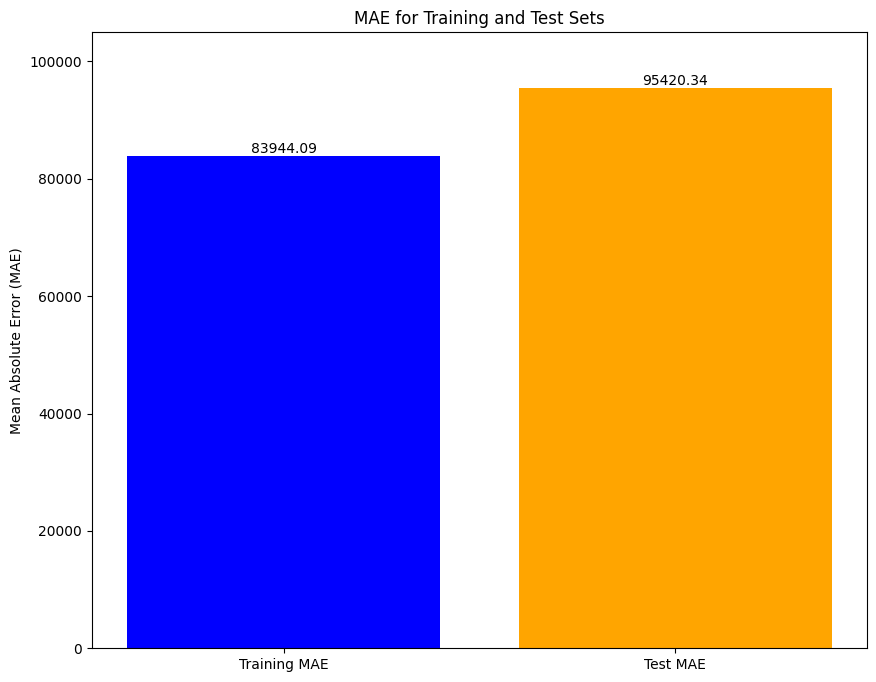

In [18]:
# evaluasi model pakai MAE
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# visualisasi MAE
labels = ['Training MAE', 'Test MAE']
values = [train_mae, test_mae]

plt.figure(figsize=(10, 8))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Test Sets')
plt.ylim(0, max(values) * 1.1)  
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')  
plt.show()

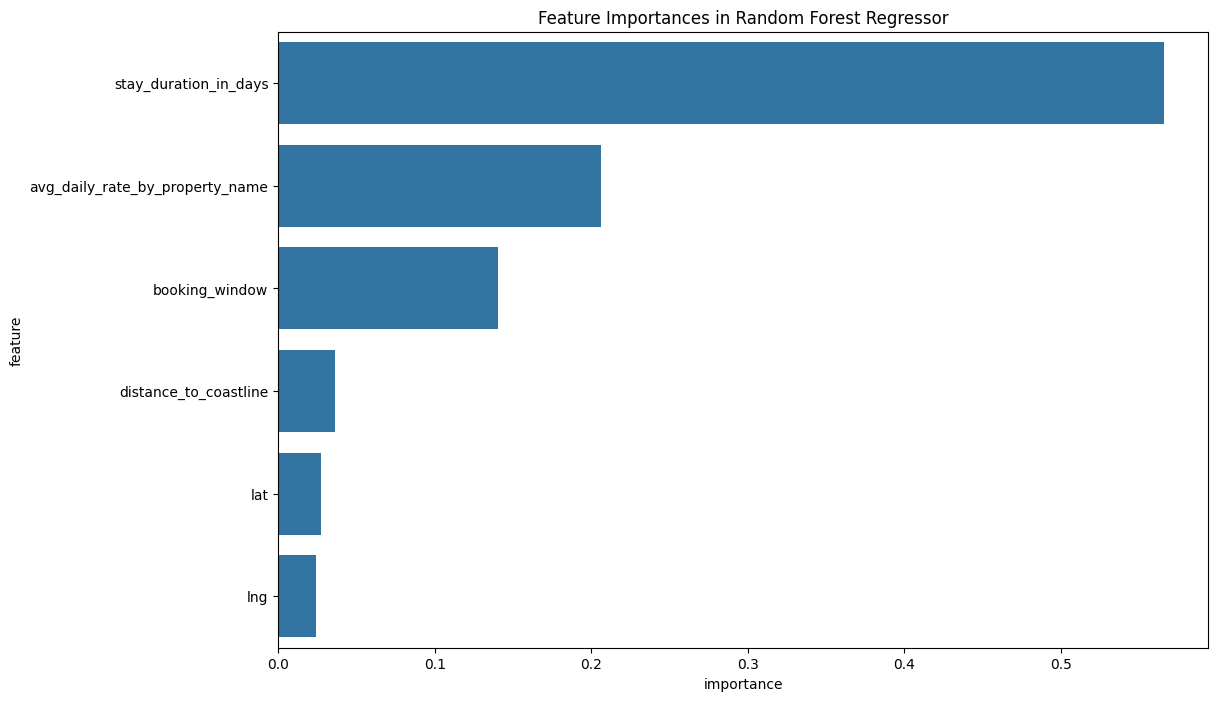

In [19]:
# untuk melihat variabel mana yang paling mempengaruhi
# inisialisasi feature importances
feature_importances = rf_regressor.feature_importances_

# buat dataframe untuk visualisasi
feature_importances_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# tampilkan feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances in Random Forest Regressor')
plt.show()